### Hello

In [2]:
import pandas as pd
from pathlib import Path

df = pd.read_csv(Path('../data/games.csv'))

/tmp/ipykernel_18643/1221864663.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path('../data/games.csv'))


In [3]:
print(df.iloc[:, 1].apply(type).value_counts())
print(df.iloc[:, 2].apply(type).value_counts())

white_elo
<class 'str'>    435456
<class 'int'>    262144
Name: count, dtype: int64
black_elo
<class 'str'>    566528
<class 'int'>    131072
Name: count, dtype: int64


In [4]:
white_elo_strings = df[df["white_elo"].apply(lambda x: isinstance(x, str))]
print(white_elo_strings["white_elo"].unique())
white_elo_strings_problematic = white_elo_strings[~white_elo_strings["white_elo"].str.isdigit()]
print(white_elo_strings_problematic['white_elo'].unique())

['1711' '1691' '1539' ... '812' '860' '808']
['?']


In [5]:
cols = ['white_elo', 'black_elo']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [6]:
df.isna().sum()

event             0
white_elo        59
black_elo        52
time_control      0
result            0
termination       0
moves           130
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697470 entries, 0 to 697599
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event         697470 non-null  object 
 1   white_elo     697470 non-null  float64
 2   black_elo     697470 non-null  float64
 3   time_control  697470 non-null  object 
 4   result        697470 non-null  object 
 5   termination   697470 non-null  object 
 6   moves         697470 non-null  object 
dtypes: float64(2), object(5)
memory usage: 42.6+ MB


In [9]:
unique_values = df[['event', 'time_control', 'result', 'termination']].apply(pd.Series.unique)

for column, values in unique_values.items():
    print(f"{column}:\n{values}")

event:
['bullet' 'classical' 'blitz' 'correspondence']
time_control:
['60+0' '900+30' '120+0' '180+0' '300+2' '600+0' '180+1' '1800+8' '1200+5'
 '300+5' '360+5' '300+8' '300+0' '900+15' '180+5' '900+8' '360+0' '480+0'
 '600+10' '360+6' '600+15' '240+3' '120+2' '900+0' '180+30' '360+8'
 '120+8' '240+0' '180+2' '600+5' '360+1' '1020+0' '420+0' '600+8' '720+0'
 '420+6' '900+1' '360+2' '1800+0' '300+1' '720+8' '1200+30' '480+8'
 '660+0' '60+2' '120+1' '300+3' '300+4' '420+9' '1200+0' '1200+6' '420+5'
 '540+0' '-' '720+14' '1800+120' '600+1' '300+15' '1200+20' '60+1' '180+8'
 '480+9' '420+11' '60+3' '240+2' '1200+1' '540+9' '1500+8' '840+8' '60+5'
 '540+3' '480+10' '240+6' '420+8' '960+20' '120+13' '180+3' '0+2' '720+12'
 '420+2' '660+5' '1500+15' '1500+1' '540+5' '180+4' '300+6' '480+1'
 '540+25' '840+5' '360+7' '1140+1' '0+1' '900+10' '240+1' '960+15' '480+3'
 '600+3' '420+3' '1500+0' '660+8' '360+9' '540+1' '900+3' '840+1' '600+2'
 '1200+10' '660+11' '720+4' '3600+15' '10800+1' '10800+8'

In [10]:
df['moves'].map(lambda x: isinstance(x, str) and x.strip() != '').sum()

697470

In [11]:
import numpy as np

np.savetxt('../data/moves.txt', df['moves'].values, fmt='%s')


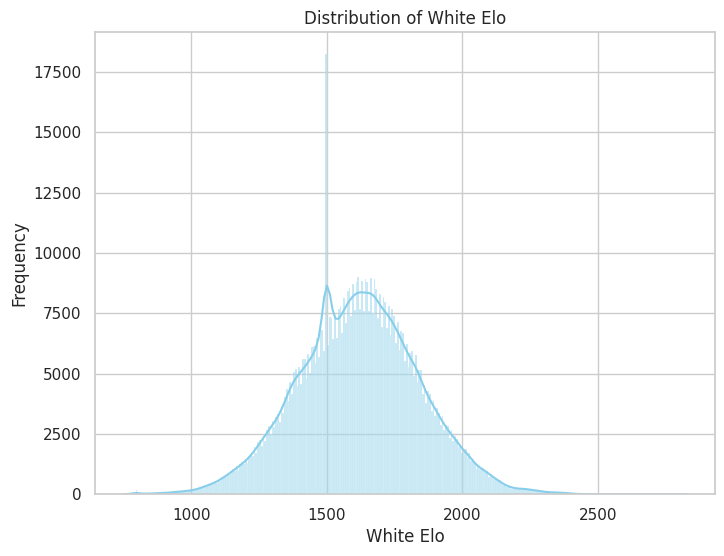

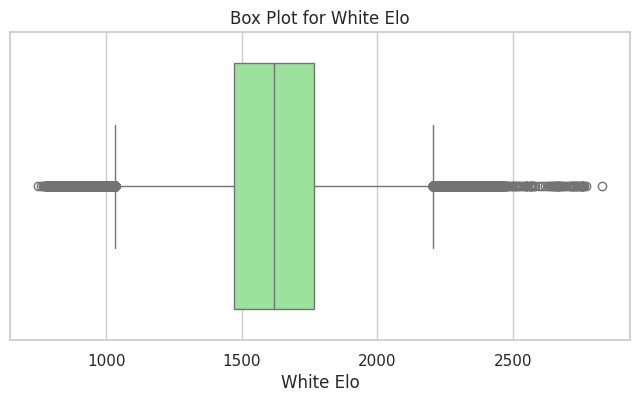

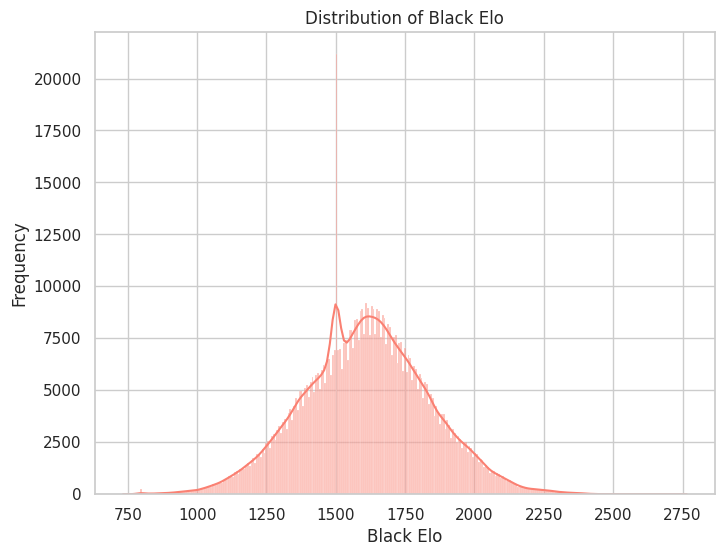

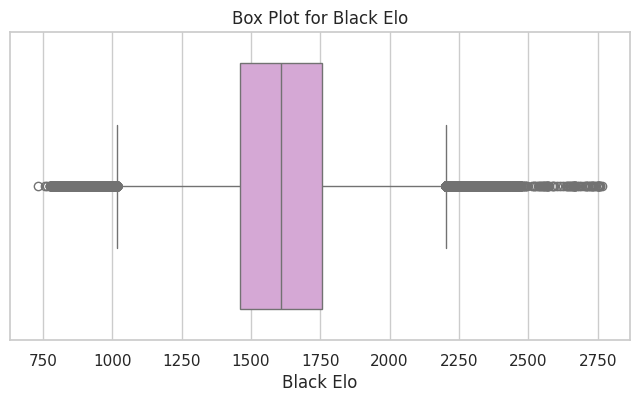

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(df['white_elo'], kde=True, color='skyblue')
plt.title('Distribution of White Elo')
plt.xlabel('White Elo')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['white_elo'], color='lightgreen')
plt.title('Box Plot for White Elo')
plt.xlabel('White Elo')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['black_elo'], kde=True, color='salmon')
plt.title('Distribution of Black Elo')
plt.xlabel('Black Elo')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['black_elo'], color='plum')
plt.title('Box Plot for Black Elo')
plt.xlabel('Black Elo')
plt.show()

In [20]:
df.to_csv('../data/rated_2014-01_initial_cleaning.csv', index=False)